# **Tracking Air Quality Trends in Chinese Cities (2020-2025)**




SJL006:(Spatial) Data Science (2022/2023), University Jaume I, Spain

Elahe Torabidashti (al448473@uji.es), Ayesha Tariq (al449180@uji.es)

**Abstract:**

<p align="justify">This project focuses on analyzing air quality trends in four major Chinese cities—<b>Beijing, Langfang, Tianjin, and Shijiazhuang</b>—using air quality datasets from <b>2020 to 2025</b>. The data includes measurements of six key air pollutants: <b>PM2.5, PM10, O3, NO2, SO2, and CO</b> with unit in <b>Micrograms per cubic meter (µg/m³)</b>. The objective is to examine both spatial and temporal variations in pollution levels through <b>trend analysis and heat maps</b>, integrating <b>shapefiles with CSV data</b> for geospatial visualization. The findings aim to provide insights into air quality patterns, supporting <b>environmental policy decisions, public health initiatives, and sustainable urban planning</b>.

**Keywords:**
1.	Air Pollution Trends
2.	Sustainable Development
3.	Geospatial Data Science
4.	Air Quality Index (AQI)
5.	Climate Change

**SDG Goals:**

1.	<b> SDG 3:</b>  Good Health and Well-being – Understanding air quality impacts on public health.
2.	<b> SDG 11:</b>  Sustainable Cities and Communities – Supporting cleaner air for sustainable
  urban development.
3.	<b> SDG 13:</b>  Climate Action – Addressing air quality as part of climate action efforts.


## **Introduction**

**Main Topic and Importance:**

<p align="justify">Air pollution is a critical environmental challenge that impacts public health, urban sustainability, and climate. In rapidly developing regions like China, fluctuating pollution levels affect millions of people and ecosystems. This project aligns with <b>SDG 3, SDG 11</b> and <b>SDG 13</b> by analyzing air quality trends in <b>Beijing, Langfang, Tianjin, and Shijiazhuang</b> from <b>2020 to 2025</b>. By examining key pollutants (<b>PM2.5, PM10, O3, NO2, SO2, and CO</b>) through <b> trend analysis and geospatial heat maps</b>, this study provides valuable insights to support <b>data-driven environmental policies, public health strategies, and sustainable urban planning</b>.


**Exploratory Questions:**

<p align="justify">What are the spatial and temporal patterns of key air pollutants (<b>PM2.5, PM10, O3, NO2, SO2, and CO</b>) in <b>Beijing, Langfang, Tianjin, and Shijiazhuang</b> from <b>2020 to 2025</b>? Additionally, which city experiences higher levels of specific pollutants, and how do these trends vary over time?

**Target Users/Stakeholders**

1. <b>Policymakers and Government Agencies</b> – To develop and enforce air quality regulations for sustainable urban planning.
2. <b>Environmental Organizations and NGOs</b> – To promote awareness and advocate for pollution control measures.
3. <b>Researchers and Academics</b> – To study air pollution trends and their environmental and health impacts.
4. <b>Public Health Authorities</b> – To assess the effects of air pollution on respiratory health and design mitigation strategies.

# **Start of the Project**

# **1-Importing the required libraries**

<p align = "justify"> In this project, we use <b>Pandas</b> for efficient data manipulation, including filtering and merging air quality records. <b>NumPy</b> helps with numerical operations such as handling missing values and performing calculations on pollutant levels. <b>Matplotlib</b> and <b>Seaborn</b> are used for data visualization, allowing us to plot trend lines and generate insightful graphical representations of air pollution trends. To enhance spatial analysis, we integrate <b>GeoPandas</b>, which enables the use of <b>shapefiles</b> to create heat maps, allowing us to visualize pollution intensity across different Chinese cities in a geospatial context.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas as gpd
import matplotlib.patches as mpatches
from google.colab import drive
import os


# **2-Connecting Drive & Reading the Data**

**Connecting to the drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the Data:**
<p align="justify">Read the CSV files for the four cities: Beijing, Langfang, Tianjin, and Shijiazhuang.The dataset contains date column and air quality parameters (PM2.5, PM10, O3, NO2, SO2, CO)

In [ ]:
city1 = pd.read_csv('/content/drive/MyDrive/G4 Final Project Data /beijing-air-quality.csv')
city2 = pd.read_csv('/content/drive/MyDrive/G4 Final Project Data /langfang-air-quality.csv')
city3 = pd.read_csv('/content/drive/MyDrive/G4 Final Project Data /shijiazhuang-air-quality.csv')
city4 = pd.read_csv('/content/drive/MyDrive/G4 Final Project Data /tianjin-air-quality.csv')


# **3-Pre-Processing**

**1-Concatinating all the Dataset:**
<p align="justify">First we will incorporate city name in each CSV file. Secondly we will concatinate all the CSV files into one dataset. This will help in better analysis and comparison of air pollution levels across different locations and understand their spatial variations. Moreover, it will also help in identifying which city experiences higher levels of specific pollutants and track trends over time for each city.



In [ ]:
city1['City'] = 'Beijing'
city2['City'] = 'Langfang'
city3['City'] = 'Shijiazhuang'
city4['City'] = 'Tianjin'
data = pd.concat([city1, city2, city3, city4], ignore_index=True)

**2-Filter Data for the Timeframe (Jan 2020 to Jan 2025):**
<p align="justify">However, since the dataset originally spanned from 2013 to 2025, a filtering step was applied to extract data only from January 2020 to January 2025. This approach was taken to enhance efficiency, reduce unnecessary computations, and focus only on the relevant time period for analysis. By working with a refined dataset, we ensure faster processing and more targeted insights into air quality trends over the selected years.

In [ ]:
filtered_data = data[(data['date'] >= '2020-01-01') & (data['date'] <= '2025-01-31')]

**Showing the filtered years:**
<p align="justify">Ensure the Date Column is a Datetime Type

In [ ]:
# Ensure 'Date' column is in datetime format
filtered_data = filtered_data.copy()  # Create a copy to avoid the duplication
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract the year and find unique values
unique_years = filtered_data['date'].dt.year.unique()

# Sort the years for readability
unique_years = sorted(unique_years)

print("Unique Years:", unique_years)


Unique Years: [2020, 2021, 2022, 2023, 2024]


**3-Handle Null Values:**
<p align="justify"><b>Create a Column for Year-Month:</b>
<p align="justify">Extract the year and month to group the data easily. To get mean value for each month and assign that value to the NULL cells.

In [ ]:
filtered_data['YearMonth'] = filtered_data['date'].dt.to_period('M')

**Verifying the new column:**

In [ ]:
print(filtered_data.columns)

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co', 'City',
       'YearMonth'],
      dtype='object')


**Changing the columns names:**

In [ ]:
filtered_data.columns = ['Date', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'City', 'YearMonth']


**4-Convert Columns to Numeric:**
<p align="justify">Ensure the parameter columns are numeric. Any invalid strings will be converted to NaN

In [ ]:
for col in ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')



**a-Inspect Data for Non-Numeric Issues**
<p align="justify">
Check the unique values in the problematic columns to identify invalid entries.
If we find invalid entries that can be empty strings or special characters, we can clean them up accordingly.

In [ ]:
for col in ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']:
    print(f"Unique values in {col}: {filtered_data[col].unique()}")


Unique values in PM2.5: [ 17.  26.  54. 120. 154. 152.  52.  55. 144.  34.  97. 148. 174. 186.
  85.  70.  95.  80.  61. 107.  82. 127. 195. 237.  41. 164. 171. 172.
 185. 190. 138.  47.  65. 163. 182. 187. 149. 159. 126. 118. 145.  64.
 101. 142.  46.  42.  90. 147.  15.  21.  32.  50. 102.  24.  58.  66.
  31.  29.  63.  69. 125.  45.  40.  30.  51.  73. 129.  81. 133. 165.
  75. 137. 146. 115. 155. 123.  88.  38.  43.  76.  96.  67.  59.  71.
  60.  33.  44.  72.  35.  93. 105.  36.  39. 106.  89.  68.  37.  53.
  99. 103.  23. 116.  56.  49.  92.  11. 136.  22. 122. 134. 150. 124.
 169. 200. 141. 114. 156. 151. 168.  62. 110. 108.  77.  86.  87. 143.
  94.  84.  91. 113. 162. 158.  25. 128. 119. 139.  27.  48. 175. 188.
  28. 100.  79. 112. 170.  98. 166. 135. 111. 167. 104. 109.  20.  83.
 194. 192. 211.  78.  19. 132. 157. 176. 177.  57. 131. 214. 121.  74.
 140. 161. 203. 193. 224. 130.  13. 180. 201. 153.  18. 173. 191. 204.
 117. 181. 243.  14.  10.  16. 219. 229. 160. 199. 17

**b-Apply Monthly Mean Imputation:**
<p align="justify">
Once the columns contain only numeric values (or NaN), we can fill missing values.

In [ ]:
for col in ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']:
    filtered_data[col] = filtered_data.groupby('YearMonth')[col].transform(lambda x: x.fillna(x.mean()))


**5-Check for Non-Numeric Entries in Rows**

In [ ]:
print(filtered_data[filtered_data['PM2.5'].apply(lambda x: isinstance(x, str))])

Empty DataFrame
Columns: [Date, PM2.5, PM10, O3, NO2, SO2, CO, City, YearMonth]
Index: []


# **4-Visualization**

**a-Trends:**
<p align="justify">
We are using trends to understand how air pollution levels have changed over time (2020-2025) in Beijing, Langfang, Tianjin, and Shijiazhuang. By identifying seasonal patterns, long-term increases or decreases in pollutant concentrations, and sudden spikes.

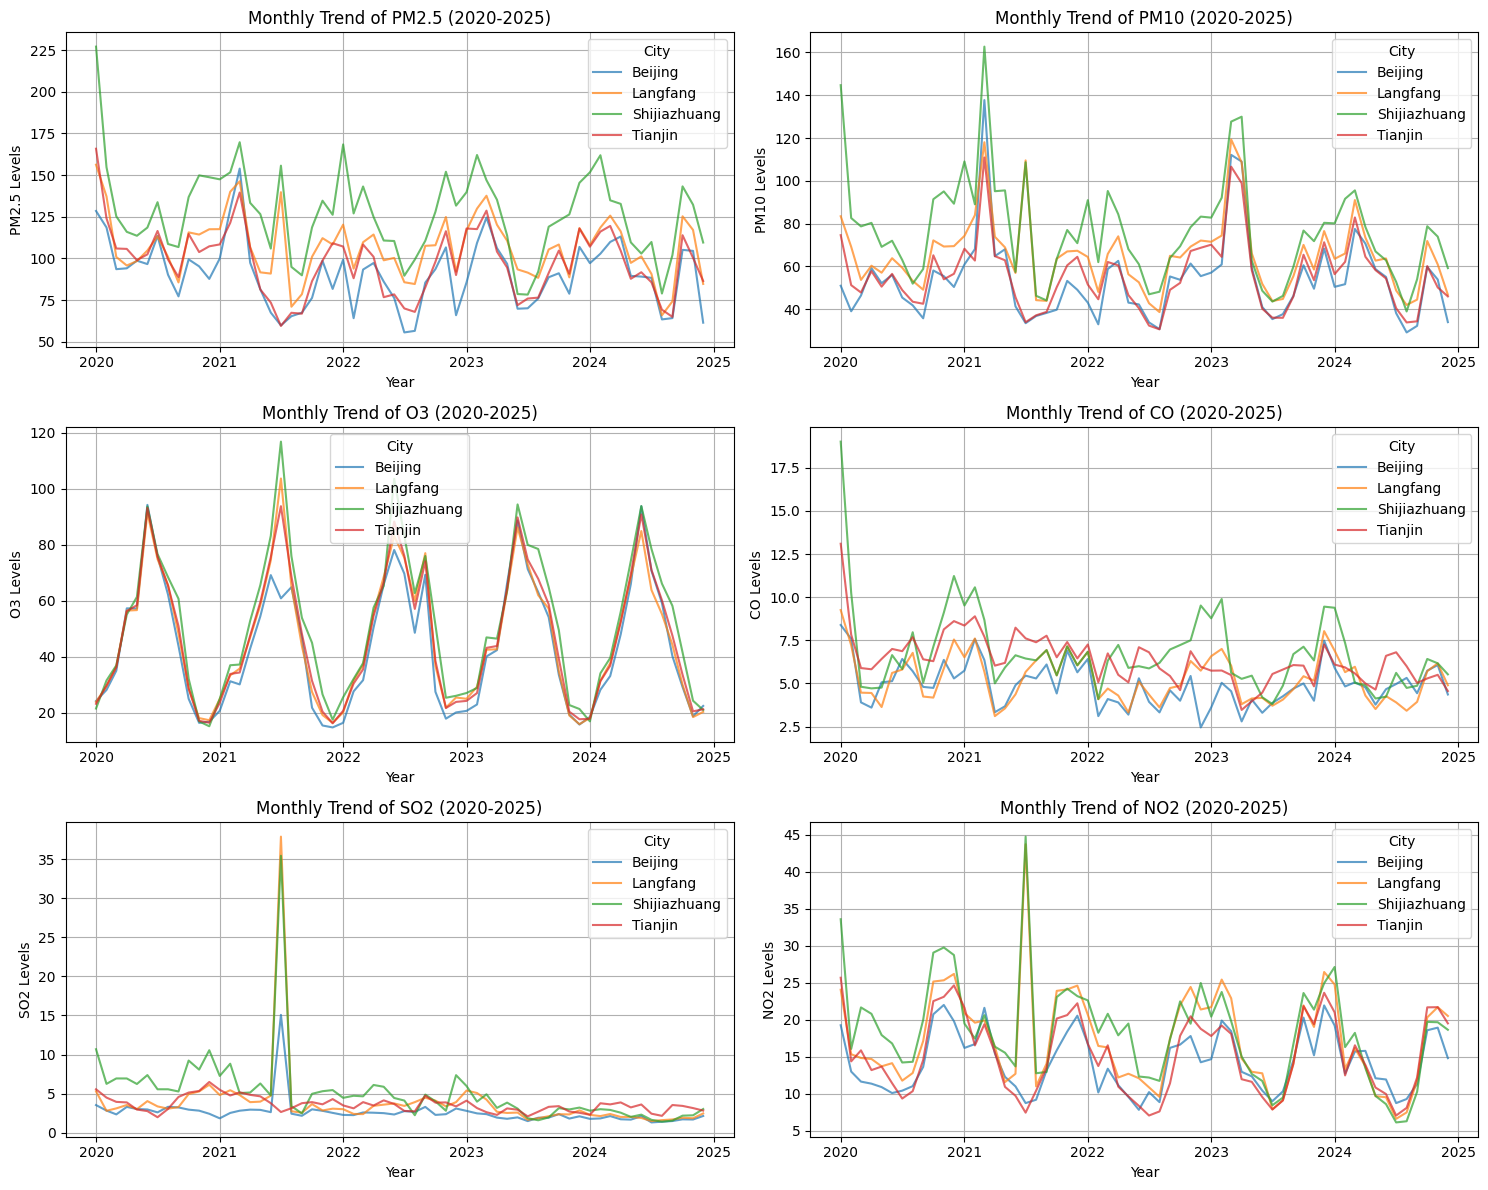

Chart saved to Google Drive: /content/drive/MyDrive/G4 Final Project Data /Air_Quality_Charts/air_quality_trends_2020_2025.png


In [ ]:
# List of parameters to visualize
parameters = ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']

# Calculate monthly means for each city and parameter
monthly_data = (
    filtered_data.groupby(['City', 'YearMonth'])[parameters]
    .mean()
    .reset_index()
)

# Convert 'YearMonth' back to datetime for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Initialize the plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Loop through each parameter and create a subplot
for i, param in enumerate(parameters):
    ax = axes[i]
    for city in monthly_data['City'].unique():  # Loop through each city
        city_data = monthly_data[monthly_data['City'] == city]
        ax.plot(
            city_data['YearMonth'],
            city_data[param],
            label=city,
            alpha=0.7
        )

    # Add labels, title, and legend to each subplot
    ax.set_title(f'Monthly Trend of {param} (2020-2025)')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{param} Levels')
    ax.legend(title='City')
    ax.grid(True)

# Path to save the plot in Google Drive
save_path = '/content/drive/MyDrive/G4 Final Project Data /Air_Quality_Charts'
os.makedirs(save_path, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'air_quality_trends_2020_2025.png'
full_path = os.path.join(save_path, file_name)


# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(full_path, dpi=300)
plt.show()

print(f"Chart saved to Google Drive: {full_path}")


**Key Findings from the Monthly Air Quality Trends (2020-2025)**

**1-PM2.5 & PM10 Trends:**  
   - Shijiazhuang shows the highest **PM2.5** and **PM10** levels, indicating severe particulate pollution.  
   - All cities exhibit seasonal fluctuations, with peaks in winter, likely due to heating emissions and atmospheric conditions.  

**2-Ozone (O3) Trends:**  
   - Strong seasonal cycles with peaks in summer, consistent across all cities.  
   - Indicates photochemical smog formation due to high temperatures and sunlight exposure.  

**3-Carbon Monoxide (CO) Trends:**  
   - Shijiazhuang shows relatively higher CO levels compared to other cities, possibly due to heavy industrial emissions.  
   - Gradual declining trend in some cities, suggesting possible air quality improvements.  

**4-Sulfur Dioxide (SO2) & Nitrogen Dioxide (NO2) Trends:**
<p align="justify">
     In mid-2021, a notable spike in Sulfur Dioxide (SO2) levels was observed across all cities, coinciding with a similar surge in Nitrogen Dioxide (NO2) concentrations, particularly in Langfang. This trend aligns with China's post-COVID-19 industrial recovery following the lifting of strict zero-COVID policies. The resurgence of industrial activities, especially in heavy industry sectors in cities like Shijiazhuang, led to increased emissions. Simultaneously, the resumption of regular traffic patterns contributed to elevated NO2 levels in urban areas such as Beijing. These findings suggest that the relaxation of pandemic-related restrictions and the subsequent economic rebound had significant environmental impacts, underscoring the need for sustainable industrial practices and effective emission controls during periods of economic recovery.

**b-Heatmaps:**
<p align="justify">
The purpose of the heatmaps is to provide a spatial comparison of air pollution levels across the selected cities.

**Loading the Shapefile:**
<p align="justify">
It contains the polygon of all four cities for creating the heatmaps

In [ ]:
# Load the shapefile
cities_shapefile = "/content/drive/MyDrive/G4 Final Project Data /AOI/AOI3.shp"
city_polygons = gpd.read_file(cities_shapefile)

**Rename the shapefile column:**
<p align="justify">
Chnaging 'NAME_2' column to 'City' to match with the monthly_data DataFrame.

In [ ]:
city_polygons.rename(columns={'NAME_2': 'City'}, inplace=True)


**Validating the column names:**
<p align="justify">
Ensure city names match with shapefile and monthly_data

In [ ]:
city_polygons['City'] = city_polygons['City'].str.strip()
monthly_data['City'] = monthly_data['City'].str.strip()

**Creating heatmap for each parameter:**

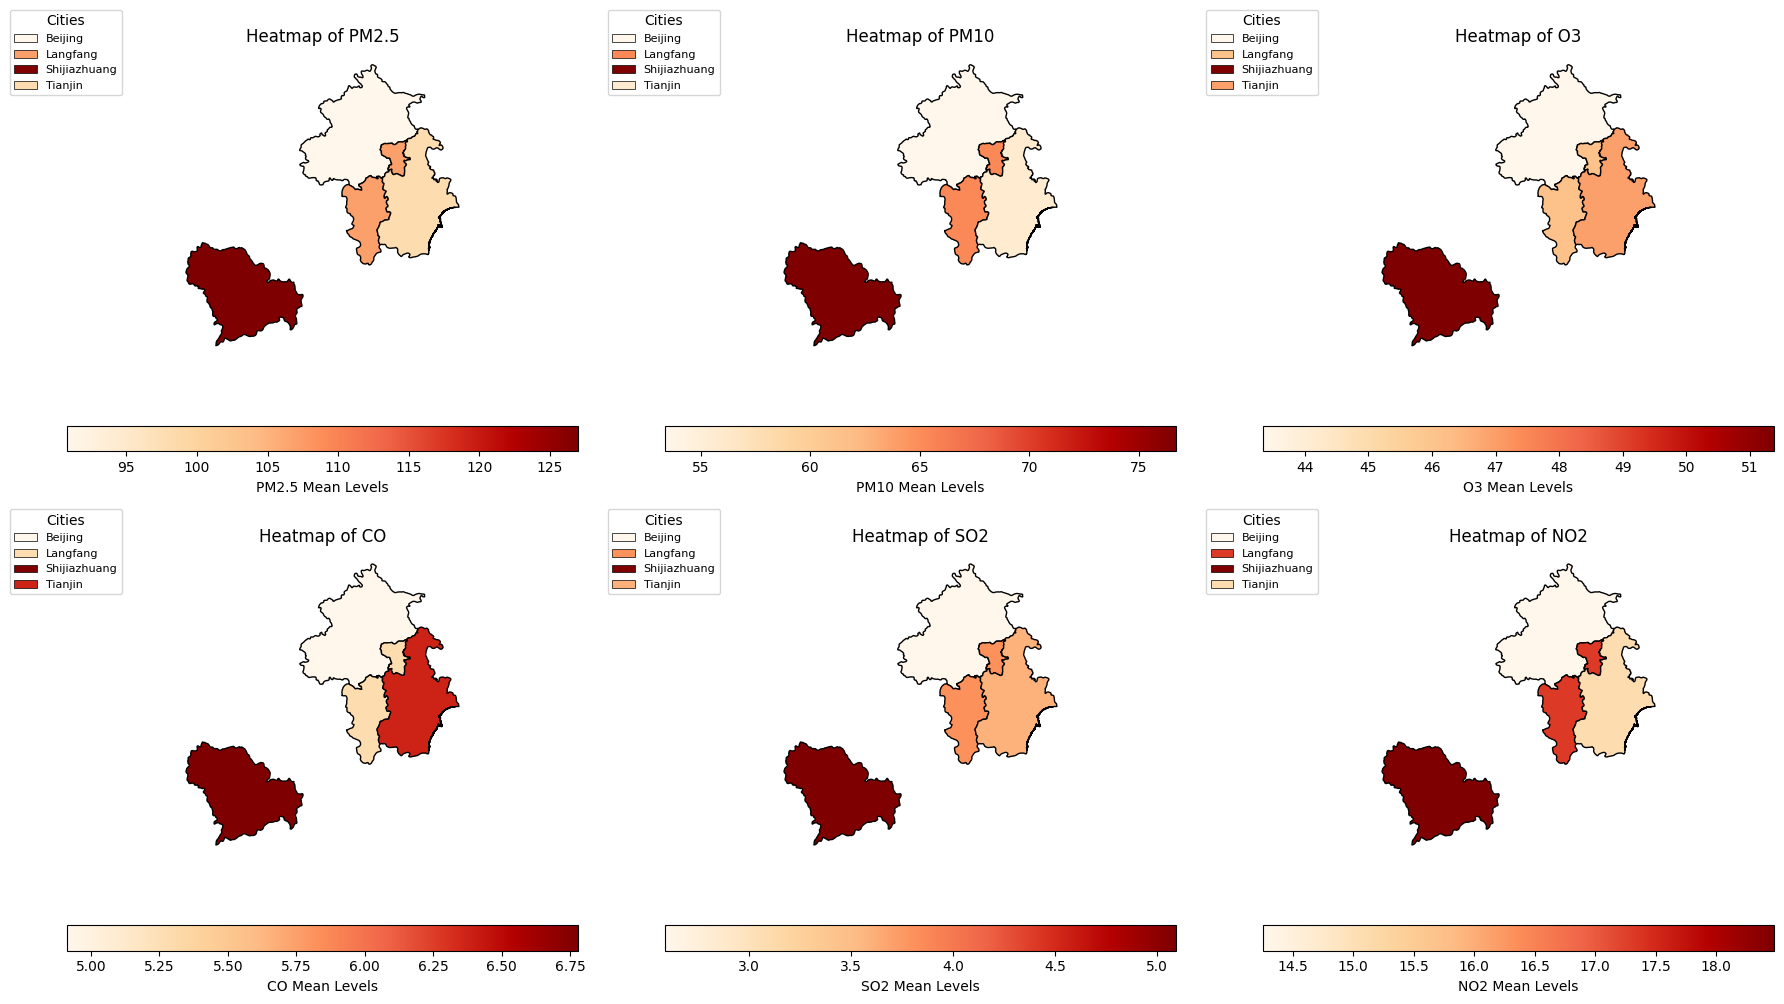

Chart saved to Google Drive: /content/drive/MyDrive/G4 Final Project Data /Air_Quality_Charts/air_quality_heatmaps_2020_2025.png


In [ ]:
# Set up the figure with a 3x3 layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

# Loop through each parameter and create a subplot
for i, param in enumerate(parameters):
    if i >= len(axes):
        break

    ax = axes[i]

    # Compute the mean value of the parameter for each city
    city_means = monthly_data.groupby('City', as_index=False)[param].mean()
    city_means.rename(columns={param: 'Mean_Value'}, inplace=True)

    # Add the mean values to the GeoDataFrame by merging
    city_polygons_with_values = city_polygons.merge(city_means, on='City', how='left')

    # Define colormap and normalization
    cmap = plt.cm.OrRd
    norm = plt.Normalize(vmin=city_polygons_with_values['Mean_Value'].min(),
                          vmax=city_polygons_with_values['Mean_Value'].max())

    # Plot the heatmap for the current parameter
    city_polygons_with_values.plot(
        column='Mean_Value',
        cmap=cmap,
        legend=True,
        ax=ax,
        edgecolor='black',
        legend_kwds={'label': f'{param} Mean Levels', 'orientation': 'horizontal'}
    )
    ax.set_title(f'Heatmap of {param}', fontsize=12)
    ax.axis('off')

    # Create a custom legend for the cities
    city_colors = {}
    for idx, row in city_polygons_with_values.iterrows():
        color = cmap(norm(row['Mean_Value']))  # Get the color for the city's value
        city_colors[row['City']] = color

    # Add the legend to the map
    legend_patches = [
        mpatches.Patch(
            facecolor=color, edgecolor='black', linewidth=0.5, label=city  # Use facecolor explicitly
        )
        for city, color in city_colors.items()
    ]
    ax.legend(
        handles=legend_patches,
        title="Cities",
        loc='upper right',
        bbox_to_anchor=(-0.15, 1.15),
        fontsize=8,
        title_fontsize=10
    )

# Hide any unused subplots
for j in range(len(parameters), len(axes)):
    fig.delaxes(axes[j])


# Path to save the plot in Google Drive
save_path = '/content/drive/MyDrive/G4 Final Project Data /Air_Quality_Charts'
os.makedirs(save_path, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'air_quality_heatmaps_2020_2025.png'
full_path = os.path.join(save_path, file_name)


# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(full_path, dpi=300)
plt.show()

print(f"Chart saved to Google Drive: {full_path}")


**Key Findings from the Heatmaps (2020-2025):**
<p align="justify">
<b>Shijiazhuang</b> consistently shows higher pollution levels across most parameters, pointing to significant air quality issues.
<b>Beijing</b> appears to have relatively cleaner air for the pollutants analyzed, while <b>Langfang and Tianjin</b> demonstrate moderate pollution levels for specific pollutants like O3 and NO2.

# **5-Conclusion:**  

<p align="justify">
The analysis of air quality trends across <b>Beijing, Langfang, Tianjin, and Shijiazhuang</b> from <b>2020 to 2025</b> reveals significant variations in pollutant levels over time. Some pollutants, such as <b>PM2.5 and PM10</b>, show seasonal fluctuations, often peaking in winter due to increased heating activities and atmospheric conditions. <b>Ozone (O3)</b> tends to rise during summer months due to higher temperatures, humidity and heavy rainfall beacuse of moonsoon season. Industrial and traffic-related pollutants like <b>NO2, SO2, and CO</b> exhibit variations based on economic activities and policy interventions. By examining these trends, we can identify periods of high pollution, assess long-term air quality changes, and evaluate the impact of regulatory measures on reducing pollution levels.